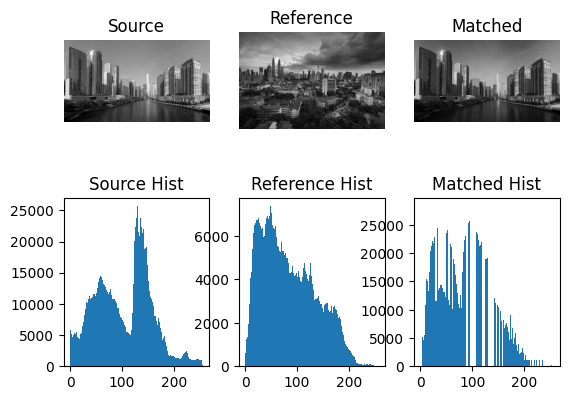

In [9]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from skimage import data, exposure
from skimage.exposure import match_histograms

# Load grayscale images
src = cv2.imread("source.png", 0)
ref = cv2.imread("reference.png", 0)

# Histogram Matching
matched = match_histograms(src, ref, channel_axis=None)

# Show images + histograms
for i,(img,title) in enumerate([(src,"Source"),(ref,"Reference"),(matched,"Matched")],1):
    plt.subplot(2,3,i); plt.imshow(img,cmap='gray'); plt.title(title); plt.axis("off")
    plt.subplot(2,3,i+3); plt.hist(img.ravel(),256,[0,256]); plt.title(title+" Hist")
plt.show()


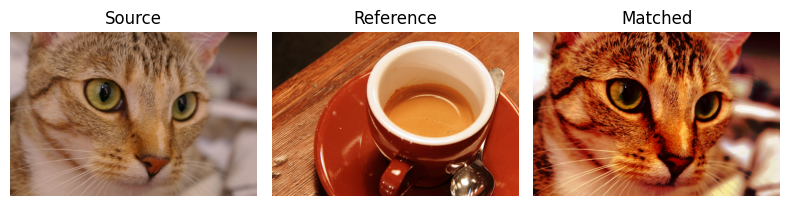

In [16]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

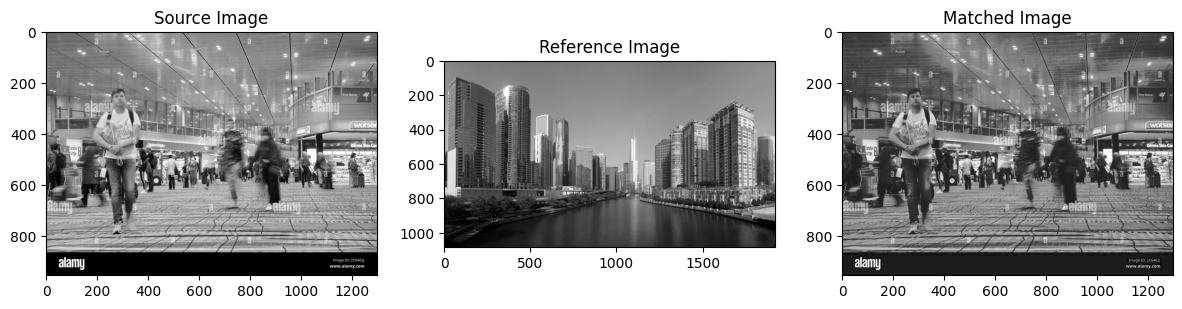

In [21]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

# Load grayscale images
src = cv2.imread("city_source.png", 0)
ref = cv2.imread("source.png", 0)

# Histogram Matching
matched = match_histograms(src, ref)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1) 
plt.imshow(src, cmap='gray') 
plt.title('Source Image')

plt.subplot(1, 3, 2)
plt.imshow(ref, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 3, 3)
plt.imshow(matched, cmap='gray')
plt.title('Matched Image')

plt.tight_layout()
plt.show()

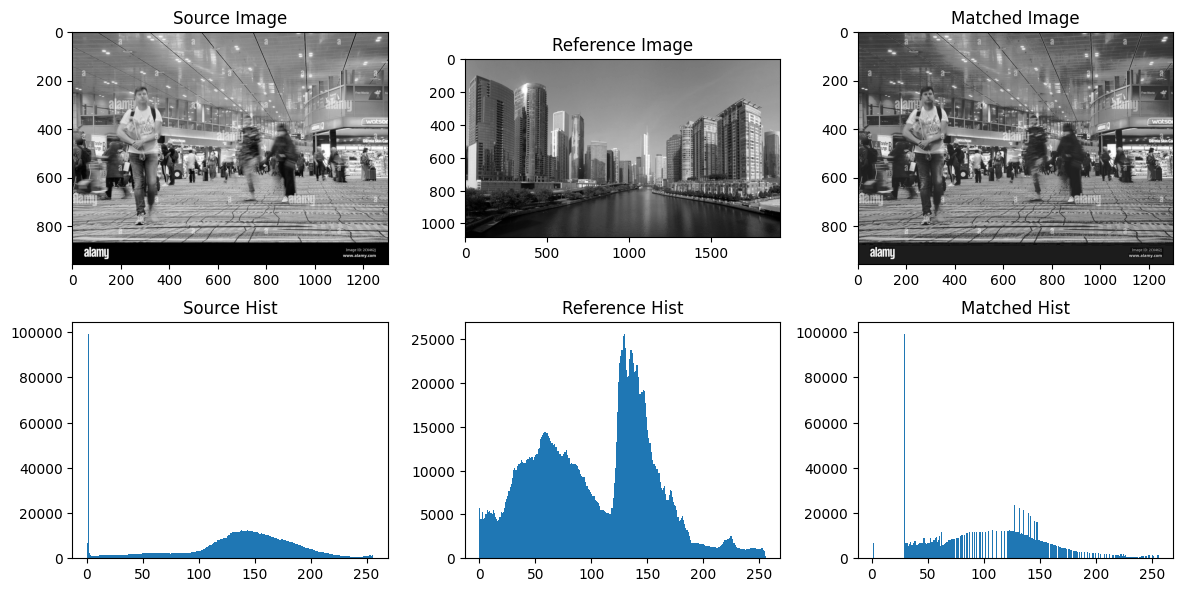

In [19]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

# Load grayscale images
src = cv2.imread("city_source.png", 0)
ref = cv2.imread("source.png", 0)

# Histogram Matching
matched = match_histograms(src, ref, channel_axis=None)

# ---- Show images ----
plt.figure(figsize=(12,6))
plt.subplot(2,3,1), plt.imshow(src, cmap='gray'), plt.title("Source Image")
plt.subplot(2,3,2), plt.imshow(ref, cmap='gray'), plt.title("Reference Image")
plt.subplot(2,3,3), plt.imshow(matched, cmap='gray'), plt.title("Matched Image")

# ---- Show histograms ----
plt.subplot(2,3,4), plt.hist(src.ravel(), 256, [0,256]), plt.title("Source Hist")
plt.subplot(2,3,5), plt.hist(ref.ravel(), 256, [0,256]), plt.title("Reference Hist")
plt.subplot(2,3,6), plt.hist(matched.ravel(), 256, [0,256]), plt.title("Matched Hist")

plt.tight_layout()
plt.show()


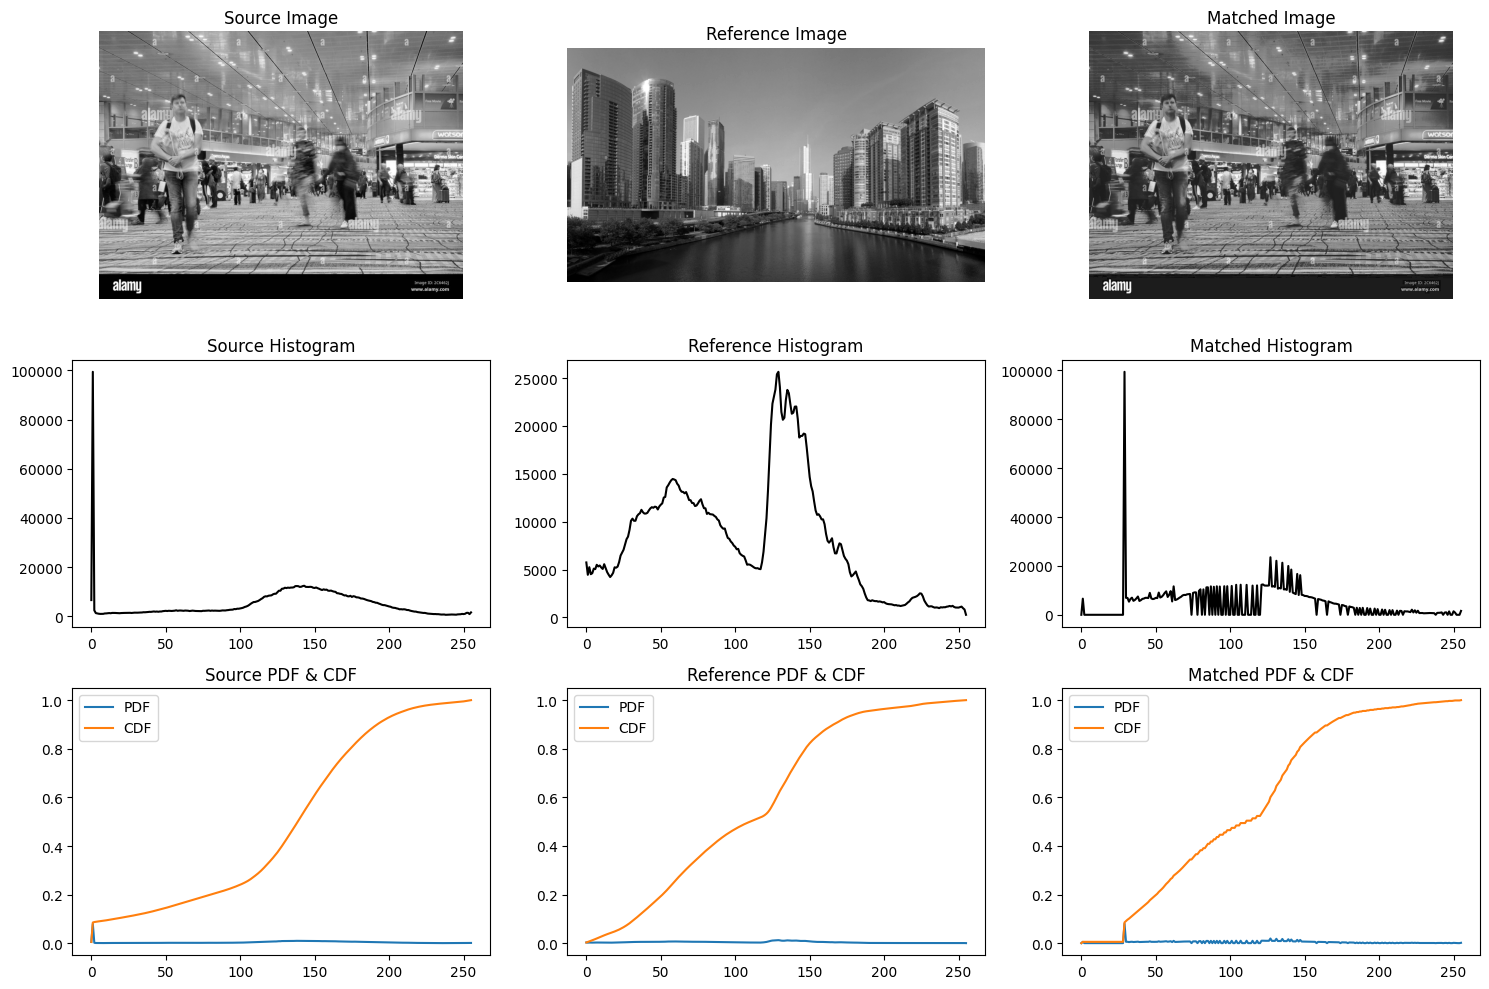

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

# Load grayscale images
src = cv2.imread("city_source.png", 0)
ref = cv2.imread("source.png", 0)

# Histogram Matching
matched = match_histograms(src, ref, channel_axis=None)

# Function to compute PDF & CDF
def get_pdf_cdf(img):
    hist, bins = np.histogram(img.ravel(), 256, [0,256])
    pdf = hist / hist.sum()
    cdf = pdf.cumsum()
    return hist, pdf, cdf

# Compute for all images
src_hist, src_pdf, src_cdf = get_pdf_cdf(src)
ref_hist, ref_pdf, ref_cdf = get_pdf_cdf(ref)
mat_hist, mat_pdf, mat_cdf = get_pdf_cdf(matched)

# ---- Show images ----
plt.figure(figsize=(15,10))
plt.subplot(3,3,1), plt.imshow(src, cmap='gray'), plt.title("Source Image"), plt.axis("off")
plt.subplot(3,3,2), plt.imshow(ref, cmap='gray'), plt.title("Reference Image"), plt.axis("off")
plt.subplot(3,3,3), plt.imshow(matched, cmap='gray'), plt.title("Matched Image"), plt.axis("off")

# ---- Histograms ----
plt.subplot(3,3,4), plt.plot(src_hist, color='black'), plt.title("Source Histogram")
plt.subplot(3,3,5), plt.plot(ref_hist, color='black'), plt.title("Reference Histogram")
plt.subplot(3,3,6), plt.plot(mat_hist, color='black'), plt.title("Matched Histogram")

# ---- PDF + CDF ----
plt.subplot(3,3,7), plt.plot(src_pdf, label="PDF"), plt.plot(src_cdf, label="CDF"), plt.title("Source PDF & CDF"), plt.legend()
plt.subplot(3,3,8), plt.plot(ref_pdf, label="PDF"), plt.plot(ref_cdf, label="CDF"), plt.title("Reference PDF & CDF"), plt.legend()
plt.subplot(3,3,9), plt.plot(mat_pdf, label="PDF"), plt.plot(mat_cdf, label="CDF"), plt.title("Matched PDF & CDF"), plt.legend()

plt.tight_layout()
plt.show()
